### Example Facebook Predictions


In [1]:
try:       importlib.reload(Jupytils)
except:    import Jupytils
    
from Jupytils.Charts import *;
%reload_ext rmagic 
%reload_ext rpy2.ipython
showTopbar("Asthma Prediction")

<IPython.core.display.Javascript object>

In [2]:
han1="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20patient_data_table";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
kimj="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kimj";
leeh="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20leeh";
sony="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20sony";
kuky="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kuky";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
patient="leeh2"
patient="hand2"
hand2="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20calculated_jlee%20WHERE%20pname=%27"+patient+"%27%20ORDER%20BY%20date,%20time"
fileName = hand2;

# => Load Data
proxies=None
df = LoadDataSet(fileName, checkForDateTime=False, proxies=proxies);
assert 'pef1' not in df.columns, "This must be old Data"
    
sdttm = df.date + " " + df.time 

if ('sdttm' not in df.columns):
    df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

df.sort_values(by='sdttm', ascending=True, inplace=True)
drps  = "cname, time, date, timeofday, dateofmeasure, npt, pef1, pef2, pef3, pef, indexpef".split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)

df

,sdttm,pname,ampm,pef_zone,tm_window,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,temperature_diff,airpressure_diff,precipitation_diff
0,2015-01-02 06:24:00,hand2,am,Y,22.700,0.004,0.700,0.025,0.024,145.000,0.078,12.790,0.428,0.300,990.300,0.003,0.563,0.019,0.013,43.626,-6.800,1.200,340.000,58.000,2.100,-13.600,1020.500,1025.000,-4.800,-3.900,1022.200,63.000,-8.500,1019.600,35.000,4.600,2.600,28.000
1,2015-01-02 17:30:00,hand2,pm,Y,23.067,0.006,0.900,0.026,0.035,54.000,0.088,13.590,0.388,0.404,647.867,0.004,0.589,0.017,0.018,28.087,-2.500,2.500,290.000,33.000,1.700,-16.600,1021.700,1026.100,-3.000,-0.800,1022.200,68.000,-8.300,1019.900,31.000,7.500,2.300,37.000
2,2015-01-03 07:19:00,hand2,am,Y,24.917,0.009,0.900,0.026,0.035,54.000,0.125,17.045,0.299,0.584,886.283,0.005,0.684,0.012,0.023,35.570,-9.600,0.600,180.000,71.000,2.100,-13.800,1022.700,1027.200,-6.900,-0.800,1023.400,71.000,-9.600,1019.900,31.000,8.800,3.500,40.000
3,2015-01-03 18:15:00,hand2,pm,Y,24.750,0.013,1.000,0.018,0.039,54.000,0.172,19.000,0.222,0.718,949.250,0.007,0.768,0.009,0.029,38.354,1.200,1.500,160.000,60.000,4.000,-5.700,1017.100,1021.400,-1.000,1.900,1023.400,71.000,-9.600,1017.100,33.000,11.500,6.300,38.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,2016-10-17 18:21:00,hand2,pm,Y,23.217,0.004,0.700,0.055,0.037,72.000,0.059,13.430,0.359,0.652,1233.783,0.003,0.578,0.015,0.028,53.142,18.200,2.500,270.000,80.000,16.600,14.600,1013.800,1017.800,17.600,22.400,1014.600,100.000,14.700,1012.600,55.000,7.700,2.000,45.000
1310,2016-10-18 06:00:00,hand2,am,Y,22.817,0.004,0.900,0.055,0.039,72.000,0.066,12.690,0.453,0.625,1205.467,0.003,0.556,0.020,0.027,52.833,11.900,0.600,250.000,100.000,13.800,11.800,1016.100,1020.200,12.900,22.400,1016.200,100.000,11.900,1013.000,55.000,10.500,3.200,45.000
1311,2016-10-18 18:01:00,hand2,pm,Y,23.667,0.006,0.900,0.032,0.064,86.000,0.086,13.802,0.315,0.725,1337.400,0.004,0.583,0.013,0.031,56.510,17.000,0.000,0.000,83.000,16.000,14.000,1015.000,1019.000,16.000,20.800,1018.100,100.000,11.000,1013.800,61.000,9.800,4.300,39.000
1312,2016-10-19 06:28:00,hand2,am,G,24.467,0.007,1.000,0.032,0.064,104.000,0.118,18.420,0.199,1.045,1752.667,0.005,0.753,0.008,0.043,71.635,11.700,0.000,0.000,100.000,13.700,11.600,1014.900,1019.000,11.900,20.800,1018.100,100.000,11.000,1014.900,61.000,9.800,3.200,39.000


In [3]:
columns = '''pefmax,pefcat,so2,co,o3,no2,windspeedms,precipitationpercent,airpressurehpa,tmax,amax'''


In [4]:
df1=df
dfAM = df1[df1.ampm == 'am'].copy();
allDays = pd.date_range(dfAM.sdttm.min(), dfAM.sdttm.max(), freq='D')
dfAM.index=dfAM.sdttm;
dfAM=dfAM.reindex(allDays, method='ffill') #fill_value=0) #'bfill')
for i,u in enumerate(dfAM.pef_zone.unique()):
    dfAM.ix[dfAM.pef_zone == u] = i+1
dfAM

,sdttm,pname,ampm,pef_zone,tm_window,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,temperature_diff,airpressure_diff,precipitation_diff
2015-01-02 06:24:00,1970-01-01 00:00:00.000000001,1,1,1,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
2015-01-03 06:24:00,1970-01-01 00:00:00.000000001,1,1,1,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
2015-01-04 06:24:00,1970-01-01 00:00:00.000000001,1,1,1,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
2015-01-05 06:24:00,1970-01-01 00:00:00.000000001,1,1,1,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-16 06:24:00,1970-01-01 00:00:00.000000002,2,2,2,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000
2016-10-17 06:24:00,1970-01-01 00:00:00.000000001,1,1,1,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
2016-10-18 06:24:00,1970-01-01 00:00:00.000000001,1,1,1,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
2016-10-19 06:24:00,1970-01-01 00:00:00.000000001,1,1,1,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [5]:
'precipitationpercent pef_zone'.split(' ')

['precipitationpercent', 'pef_zone']

In [9]:
importlib.reload (Jupytils.Charts)

ddf=dfAM;
PlotHCts(ddf, ddf.index, 'precipitationpercent pef_zone'.split(' '), title="Sample Chart for "+ str(ddf.pname[0]) );

In [11]:
from datetime import datetime
import fbprophet 
from fbprophet import Prophet

prdf = dfAM

prdf['ds'] = prdf.index
prdf['ds'] = pd.DatetimeIndex(prdf.ds)
prdf['y']  = prdf.pef_zone
#importlib.reload(fbprophet.Prophet)

my_model1 = Prophet(interval_width=0.95)
#my_model1.extra_regressors={'so2': df1.so2,'co': df1.co, 'no2' :df1.no2, 'precipitationpercent': df1.precipitationpercent}
my_model1.fit(prdf);
prdf=prdf['ds y'.split()]
prdf.index=range(0, len(prdf))
prdf

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,y
0,2015-01-02 06:24:00,1
1,2015-01-03 06:24:00,1
2,2015-01-04 06:24:00,1
3,2015-01-05 06:24:00,1
...,...,...
653,2016-10-16 06:24:00,2
654,2016-10-17 06:24:00,1
655,2016-10-18 06:24:00,1
656,2016-10-19 06:24:00,1


In [12]:
future_dates = my_model1.make_future_dataframe(periods=36)#, freq='12h')
display(future_dates[-37::])
forecast = my_model1.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds
656,2016-10-19 06:24:00
657,2016-10-20 06:24:00
658,2016-10-21 06:24:00
659,2016-10-22 06:24:00
...,...
689,2016-11-21 06:24:00
690,2016-11-22 06:24:00
691,2016-11-23 06:24:00
692,2016-11-24 06:24:00


,ds,yhat,yhat_lower,yhat_upper
688,2016-11-20 06:24:00,1.046,0.330,1.831
689,2016-11-21 06:24:00,1.067,0.302,1.867
690,2016-11-22 06:24:00,1.067,0.304,1.801
691,2016-11-23 06:24:00,0.993,0.241,1.716
692,2016-11-24 06:24:00,1.068,0.299,1.830


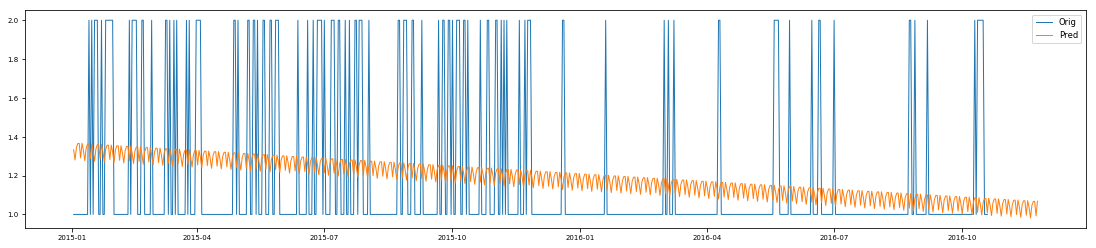

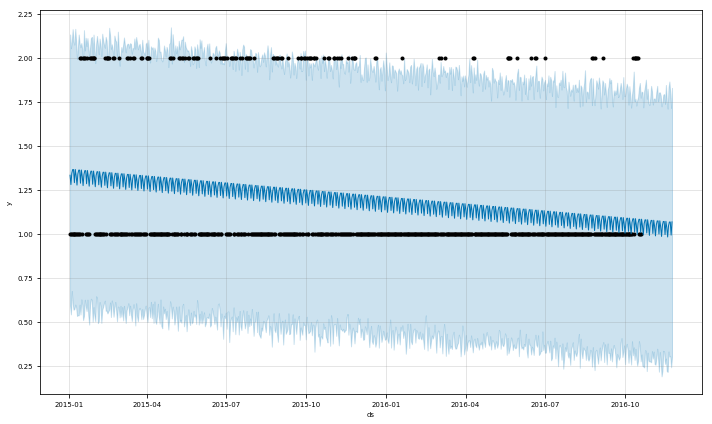

In [14]:
fig=plt.figure(figsize=(19,4) )
plt.plot(ddf.ds, ddf.y, label="Orig")
plt.plot(forecast.ds, forecast.yhat, label="Pred")
plt.legend()
df1
my_model1.plot(forecast, uncertainty=True);


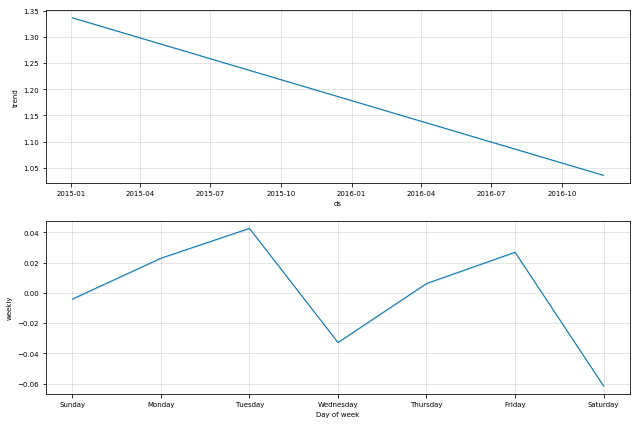

In [15]:
my_model1.plot_components(forecast);

-----
###  SECOND DATA SET 
#### Airline Passenger Prediction using Prophet

In [ ]:
df = LoadDataSet('../data/AirPassengers.csv')
df['Month'] = pd.DatetimeIndex(df['Month'])
df.columns = "ds,y".split(',')
layout = go.Layout( showlegend=False, height=400, width=pwidth )
t2 = go.Scatter( x = df.ds, y = df.y, line=line, marker=marker, mode = 'lines+markers')
fig = go.Figure(data=[t2], layout=layout)
iplot(fig)



In [ ]:
from datetime import datetime
import fbprophet 
from fbprophet import Prophet
#importlib.reload(fbprophet.Prophet)

my_model = Prophet(interval_width=0.95)
my_model.fit(df)


In [ ]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

my_model.plot(forecast, uncertainty=True);


In [ ]:
my_model.plot_components(forecast)